1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps
    

Float Processed: silica sand (73%), calcium oxide (9%), soda (13%) and magnesium (4%)
Non_Float_Processed: 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv('glass.csv')


In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.shape

(214, 10)

In [7]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

#### Since we are going for unsupervised. We are dropping Target column `Type`

In [8]:
df.drop(['Type'],axis=1,inplace=True)

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### Create  'ID' columnm

- 1) It will help to identify which glass/observation belongs to which cluster
- 2) So indexs may get dropped with outlier treatment

In [10]:
df['ID'] = df.index + 100

In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,104


What are the  two important pre-processing steps for clustering?
- 1 Outlier treatment
- 2 Feature Scaling  


In [18]:
list(enumerate(df.columns[:-1]))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

In [19]:
f = df.columns[:-1]

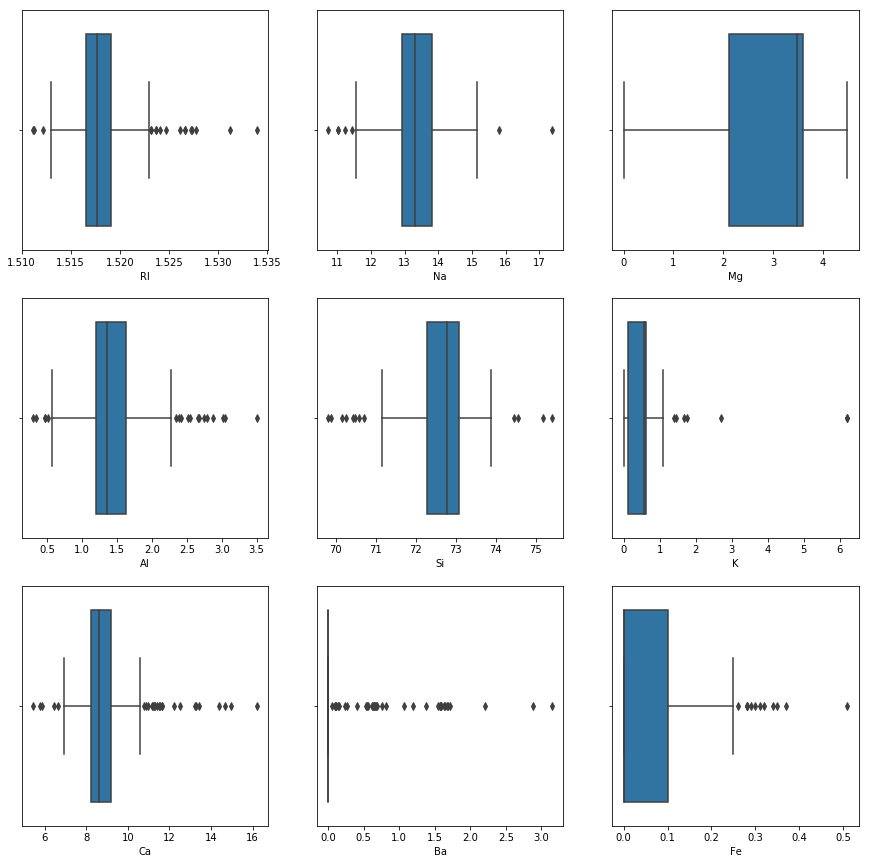

In [21]:
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

### How to deal with outliers?

1. You may drop them.
    - When you have less outliers.
    - And you have good amount of data.
2. Capping.
    - We restrict the outliers at certain percentile.
    - Soft Capping: We use 1-99 as the percentile cutoff
        - I am least disturbing the data or I am least changing the data.
        - When you have less outliers and you don't have the option to drop, then you may use this capping range.
    - Hard Capping: We use 5-95 as the percentile cutoff
        - A lot of data will be getting changed.
        - We may use it if the column is having so may outliers and is the only column in the data with the outlier.
3. Doing Nothing
    - If all the columns/most of the columns are having outliers in a certain range(above or below), then we may ignore/leave them, because they may form a cluster of itself.
4. Transformation
    - We may also transform the data into new dimesnsions where I don't have any influence of the outliers and hence no treatment is required.
        - PCA
        - LOG
        - POWER

### Outliers

In [22]:
f

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [23]:
for i in f:
    q1 = df[i].quantile(0.01)
    q3 = df[i].quantile(0.99)
    df[i][df[i] < q1] = q1
    df[i][df[i] > q3] = q3
    #df[i]  = df[i].apply(lambda x:x if x<q1 else q1)
    #df[i]  = df[i].apply(lambda x:x if x>q3 else q3)

C:\Users\kphan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kphan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kphan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kphan\An

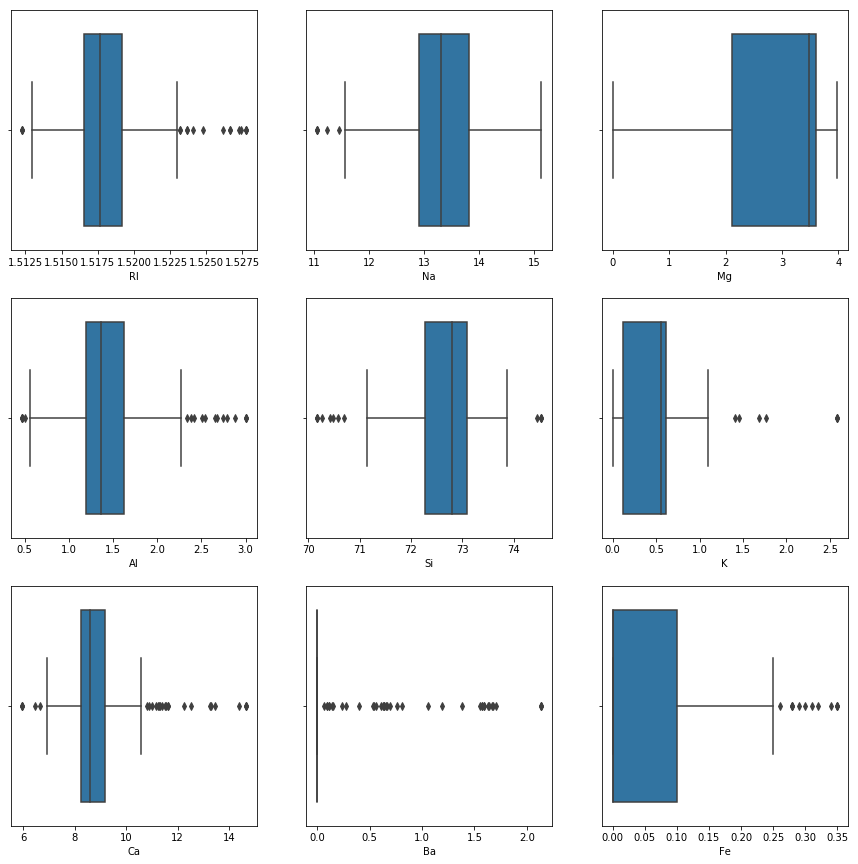

In [24]:
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

### Scaling



#### Very important to keep all the columns intact in the same unit/scale because distance calulation can
#### get influenced because of different units for various columns and wihth in columns

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104


In [28]:
ss = StandardScaler()
df_2 = ss.fit_transform(df.drop("ID", axis=1))

In [30]:
df_2 = pd.DataFrame(df_2)

In [33]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'ID'], dtype='object')

In [34]:
df_2.columns = df.columns[:-1]
df_2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741


### Steps For Clustering

- Preprocessing
    - Outlier Treatment
    - Scaling
- Check for Cluster Tendency: Here we will check if the data which we are using for clustering is actually having some clusters or not?
    - Hopkins Score
- Find the value of K
    - Business Logic
    - Silhouette
    - Elbow/SSD
- Run Final K-Means Algo
    - Use the value of K that was found out in the last step
- Cluster Profiling
    - Trying to make sense out of the cluster formed.
    - Finding the overall profile/property of the cluster formed
    

In [35]:
## Check the HOPKINS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
hopkins(df_2)

0.8092741953885753

In [56]:
# Let's run K-Means with different value of  K to check SILHOUETTE SCORE
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k, random_state=0).fit(df_2)
    
    sil.append([k,silhouette_score(df_2,kmean.labels_)])
   
 
    

In [57]:
sil

[[2, 0.40582179495797444],
 [3, 0.3673729456231888],
 [4, 0.3896579135790243],
 [5, 0.36383492856687755],
 [6, 0.33201129969721604],
 [7, 0.3470784394455467],
 [8, 0.3511437557089502],
 [9, 0.291115029603198],
 [10, 0.30214868505570397]]

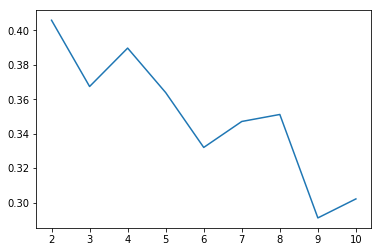

In [59]:
sil = pd.DataFrame(sil)
plt.plot(sil[0], sil[1])
plt.show()

In [52]:
kmean.labels_

array([0, 7, 7, 7, 7, 6, 7, 7, 1, 7, 6, 7, 6, 6, 7, 7, 7, 0, 1, 7, 6, 0,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 1, 7, 0, 0, 7, 7, 7, 0,
       6, 1, 6, 0, 0, 1, 0, 1, 7, 7, 7, 6, 6, 7, 7, 7, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 6, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 6, 7, 7, 1, 6, 6, 7, 7, 6, 7, 6, 0, 0, 3, 3, 3, 4, 4,
       3, 3, 3, 1, 7, 1, 1, 7, 6, 7, 7, 6, 7, 7, 1, 1, 7, 1, 1, 1, 4, 3,
       7, 1, 7, 6, 6, 7, 7, 7, 7, 6, 6, 7, 6, 6, 1, 7, 7, 7, 6, 0, 1, 7,
       7, 7, 7, 0, 1, 1, 1, 6, 6, 9, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 6, 4,
       1, 1, 1, 1, 2, 2, 4, 4, 2, 9, 9, 1, 0, 0, 2, 2, 2, 8, 8, 2, 2, 2,
       2, 2, 2, 7, 2, 8, 2, 8, 8, 9, 2, 2, 8, 8, 8, 8])

### RULE FOR CHOOSING VALUE OF K

- Never go with k=2 as the option because it means you divide the complete data into two halfs and it's not useful for any business case.
- If you have option to choose between two values of K, always go with a lesser value.
- Since we will be taking business decisions based on the cluster result, it's awlays a good idea to go with a lower value of K so that it's easy to take and implement business decisions.
- Silhouette: That value of k for which the score is maximum
- Elbow, you look at the elbow of the curve

C:\Users\kphan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kphan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kphan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


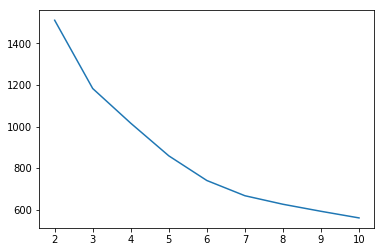

In [64]:
# Elbow
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df_2)
    ssd.append([k, kmean.inertia_])
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

In [ ]:
KMeans()

In [77]:
## K=3 Final KMeans Analysis
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(df_2)

KMeans(n_clusters=3, random_state=0)

In [78]:
kmean.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
df['label'] = kmean.labels_

In [80]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,label
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100,2
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101,0
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102,0
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103,0
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104,0


In [81]:
df.label.value_counts()

0    135
2     50
1     29
Name: label, dtype: int64

### Cluster Profiling

Add the labels generated by the algo back to the original dataframe

In [82]:
df.groupby("label")[["K","Ca","Ba","Fe"]].mean()

,K,Ca,Ba,Fe
label,,,,
0,0.617284,8.414356,0.016148,0.062721
1,0.171724,8.478138,0.989055,0.013448
2,0.213400,10.676816,0.095526,0.063174


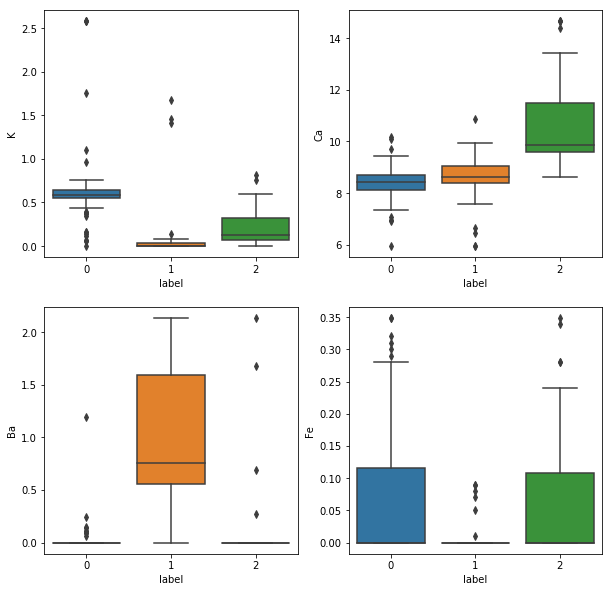

In [83]:
f = ["K", "Ca", "Ba", "Fe"]
plt.figure(figsize=(10,10))
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data=df, x='label', y=i[1])

### Check how many observations are clustered in each cluster?


### Profile



0 : Consists rich 'Fe' Glasses <br>
1 : Consists rich 'Ba' Glasses <br>
2 : Consists rich 'Ca' Glasses <br>

In [88]:
df[df['label'] == 1].ID

163    263
180    280
181    281
182    282
184    284
186    286
190    290
191    291
192    292
193    293
194    294
195    295
196    296
197    297
198    298
199    299
200    300
202    302
203    303
204    304
205    305
206    306
207    307
208    308
209    309
210    310
211    311
212    312
213    313
Name: ID, dtype: int64